# 問題1：データセットの取得

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

train_dataset = pd.read_csv("./train.csv")
# print(train_dataset)

___
# 問題2：データセット自体の調査

<p><b> [train.csvについて] </b></p>
物件の立地条件や間口の広さなど形状情報、売れた時期や売値など、不動産の売買記録と売買した不動産の情報についてまとめられている。

___
# 問題3：データの確認

In [6]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

** [各特徴量がどういったものか] **  
このデータセットには、int64とobjectのデータが多く含まれる。  
  
** [今回の目的変数] **  
SalePrice  
  
** [特徴量の平均値と標準偏差、四分位数の表示] **

In [11]:
train_dataset.iloc[:, :-1].describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


___
# 問題4：欠損値への対応

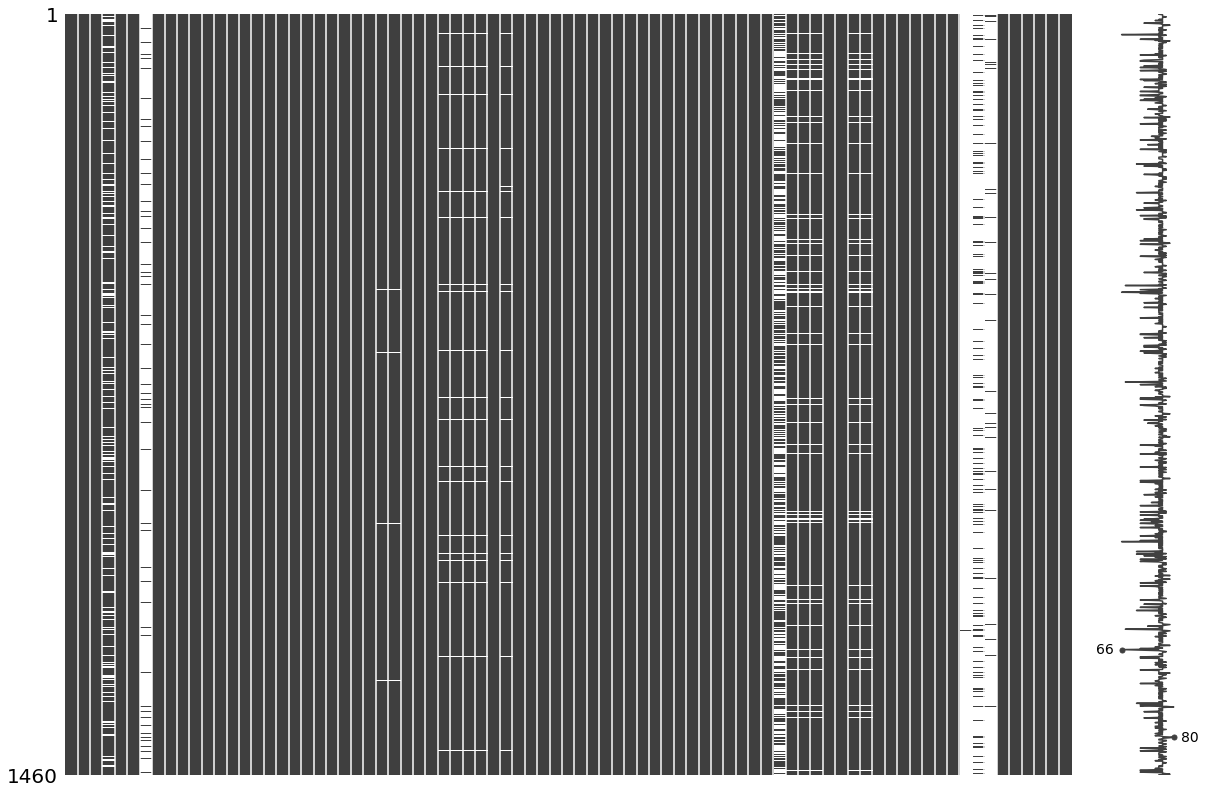

In [2]:
import missingno as msno

# 各特徴量の欠損値の有無を確認する
msno.matrix(df=train_dataset, figsize=(20, 14))

In [3]:
# 欠損値が何パーセント含まれるかを確認する
def check_null(df):
    for i in df.columns:
        print("===  [" + i + "]" )
        print("NULL数:" + str(df[i].isnull().sum() )+
                 "　　　　NULL率:" + str((df[i].isnull().sum()/len(df)).round(3)) +
                 "    データの種類数:" + str(df[i].value_counts().count()))
        
check_null(train_dataset)

===  [Id]
NULL数:0　　　　NULL率:0.0    データの種類数:1460
===  [MSSubClass]
NULL数:0　　　　NULL率:0.0    データの種類数:15
===  [MSZoning]
NULL数:0　　　　NULL率:0.0    データの種類数:5
===  [LotFrontage]
NULL数:259　　　　NULL率:0.177    データの種類数:110
===  [LotArea]
NULL数:0　　　　NULL率:0.0    データの種類数:1073
===  [Street]
NULL数:0　　　　NULL率:0.0    データの種類数:2
===  [Alley]
NULL数:1369　　　　NULL率:0.938    データの種類数:2
===  [LotShape]
NULL数:0　　　　NULL率:0.0    データの種類数:4
===  [LandContour]
NULL数:0　　　　NULL率:0.0    データの種類数:4
===  [Utilities]
NULL数:0　　　　NULL率:0.0    データの種類数:2
===  [LotConfig]
NULL数:0　　　　NULL率:0.0    データの種類数:5
===  [LandSlope]
NULL数:0　　　　NULL率:0.0    データの種類数:3
===  [Neighborhood]
NULL数:0　　　　NULL率:0.0    データの種類数:25
===  [Condition1]
NULL数:0　　　　NULL率:0.0    データの種類数:9
===  [Condition2]
NULL数:0　　　　NULL率:0.0    データの種類数:8
===  [BldgType]
NULL数:0　　　　NULL率:0.0    データの種類数:5
===  [HouseStyle]
NULL数:0　　　　NULL率:0.0    データの種類数:8
===  [OverallQual]
NULL数:0　　　　NULL率:0.0    データの種類数:10
===  [OverallCond]
NULL数:0　　　　NULL率:0.0    データの種類数:9
===  [YearBuilt

In [4]:
# 5つ以上欠損値がある特徴量（列）は削除する。
train_dataset_alt = train_dataset.drop(columns=["LotFrontage", "Alley", "MasVnrType", \
                                            "MasVnrArea", "FireplaceQu", "GarageType", \
                                            "GarageYrBlt", "GarageFinish", "GarageQual", \
                                            "GarageCond", "PoolQC", "Fence", "MiscFeature", \
                                            "BsmtQual", "BsmtCond", "BsmtExposure", \
                                            "BsmtFinType1", "BsmtFinType2"])

# 欠損値があるサンプル（行）は削除する。
train_dataset_alt[train_dataset_alt.isnull().any(axis=1)]
train_dataset_alt2 = train_dataset_alt.drop(index=1380)
train_dataset_alt2

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


___
# 問題5：用語の調査

** [尖度] **  
どれだけ尖った形で分布しているかを表す指標。  
大きければ、より尖っていることを表す。
正規分布の場合、尖度＝３となる。
 - 尖度 > 0: 正規分布より尖った状態
 - 尖度 < 0: 正規分布よりなめらかな状態 
 
** [歪度] **  
正規分布に対し、どれだけ左右にずれているかを表す指標。
 - 歪度 > 0: 正規分布に対し、右にずれている
 - 歪度 < 0: 正規分布に対し、左にずれている


___
# 問題6：分布の確認

尖度＝6.522479396377786
歪度＝1.8842426995414119


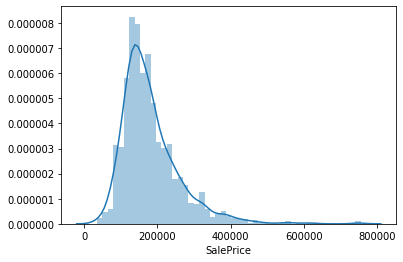

In [5]:
# seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。
import scipy

# string label to categorical values
from sklearn.preprocessing import LabelEncoder

for i in range(train_dataset_alt2.shape[1]):
    if train_dataset_alt2.iloc[:,i].dtypes == object:
        lbl = LabelEncoder()
        lbl.fit(list(train_dataset_alt2.iloc[:,i].values))
        train_dataset_alt2.iloc[:,i] = lbl.transform(list(train_dataset_alt2.iloc[:,i].values))

sns.distplot(train_dataset_alt2["SalePrice"])

print("尖度＝{}".format(scipy.stats.kurtosis(train_dataset_alt2["SalePrice"])))
print("歪度＝{}".format(scipy.stats.skew(train_dataset_alt2["SalePrice"])))

尖度＝0.8024960498483269
歪度＝0.12906669371479143


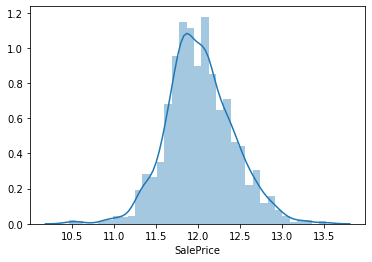

In [6]:
# 目的変数に対して対数変換を行う。
y = np.log(train_dataset_alt2["SalePrice"])
sns.distplot(y)
print("尖度＝{}".format(scipy.stats.kurtosis(y)))
print("歪度＝{}".format(scipy.stats.skew(y)))

** [対数変換の前後の比較] **  
対数変換することで、正規分布に近づいた。

___
# 問題7：相関係数の確認

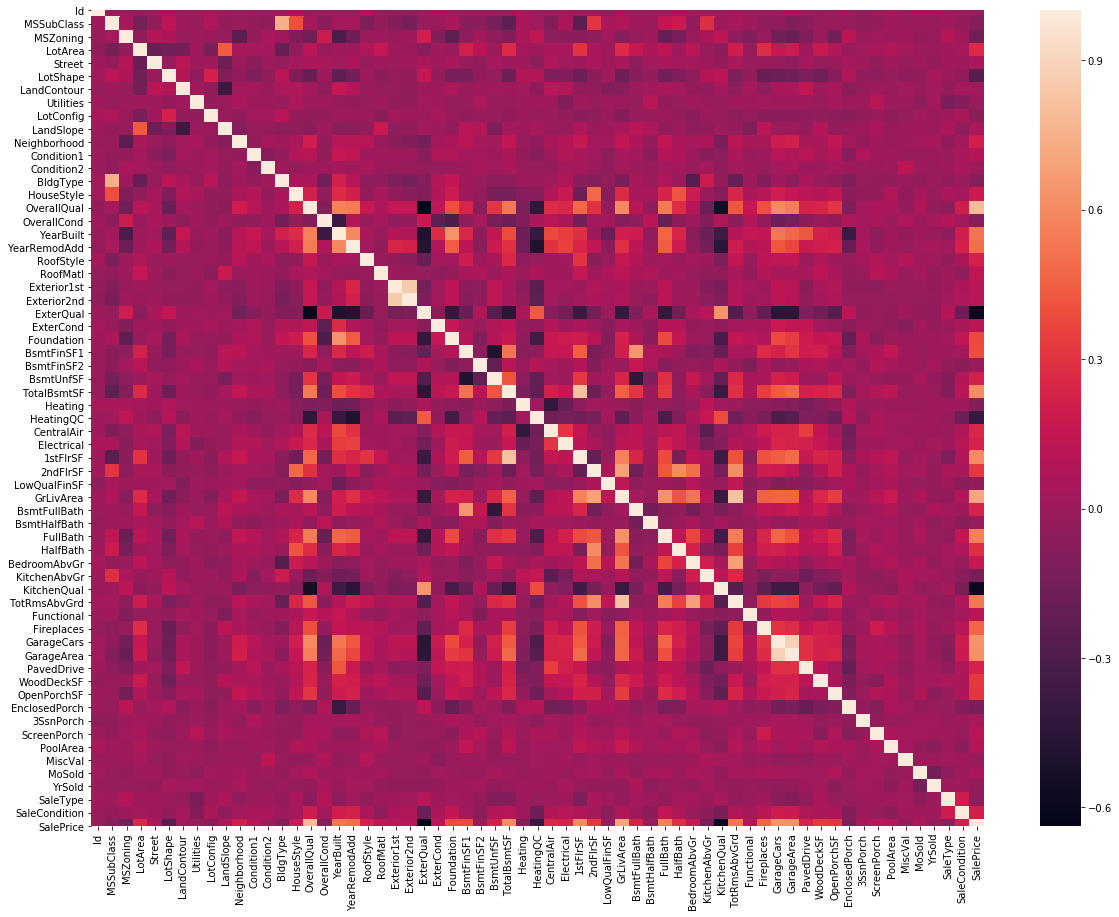

In [7]:
# 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(train_dataset_alt2.corr(method="pearson"), ax=ax)

<p><b>SalePriceと相関の高い属性10個</b></p>

1. OverallQual
1. GarageArea
1. GarageCars
1. TotRmsAbvGrd
1. GrLivArea
1. 1stFlrSF
1.TotalBsmtSF
1. YearBuilt
1. YearRemodAdd
1. FullBath

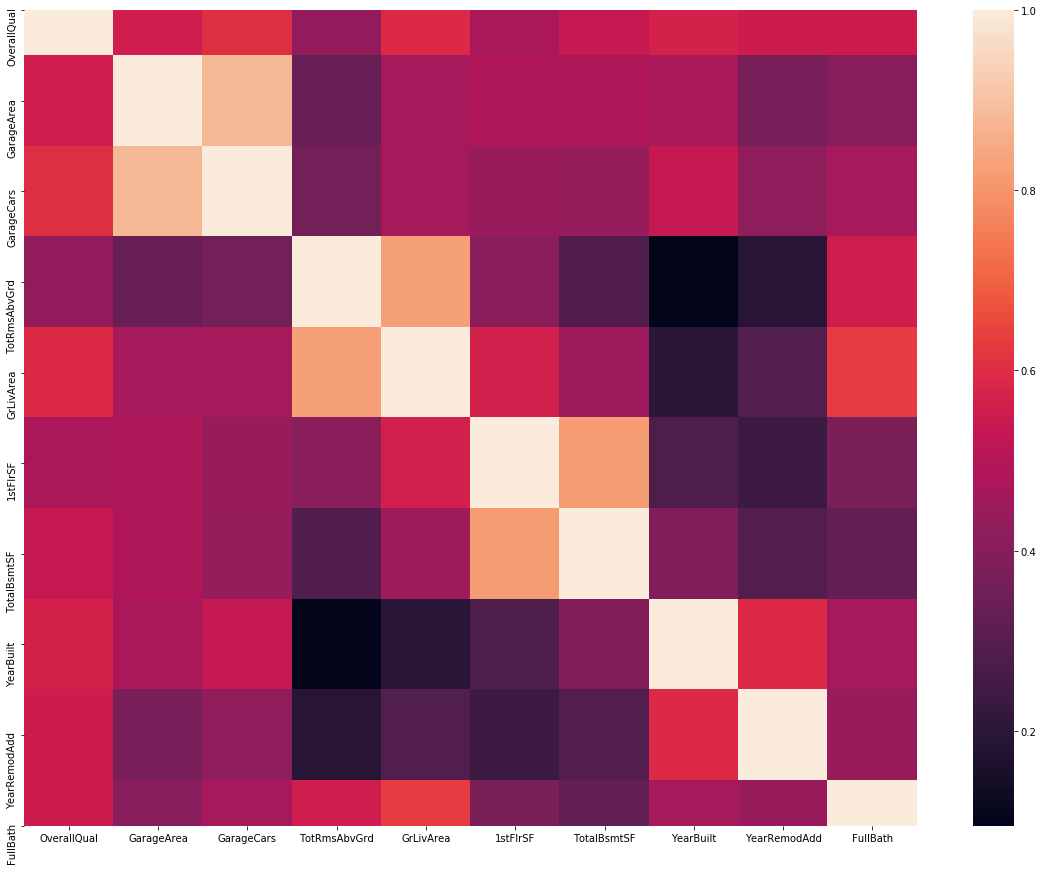

In [20]:
ten_attr_and_target = ["OverallQual", "GarageArea", "GarageCars", "TotRmsAbvGrd", "GrLivArea", \
                       "1stFlrSF", "TotalBsmtSF", "YearBuilt", "YearRemodAdd", "FullBath"]

ten_attr_df = pd.DataFrame(index=train_dataset_alt2.index, columns=ten_attr_and_target)

for attr in ten_attr_and_target:
    ten_attr_df[attr] = train_dataset_alt2.loc[:, [attr]]

# ten_attr_df


fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(ten_attr_df.corr(method="pearson"), ax=ax)

<p><b>選んだ属性10個の説明</b></p>

1. OverallQual：使用素材の全体的な品質と仕上がりの品質
1. GarageArea：ガレージのサイズ（平方フィート）
1. GarageCars：ガレージの車両収納許容台数
1. TotRmsAbvGrd：地上にある部屋の総数
1. GrLivArea：地下の生活可能面積（平方フィート）
1. 1stFlrSF：1階のサイズ（平方フィート）
1. TotalBsmtSF：地下階の総面積（平方フィート）
1. YearBuilt：建設された年
1. YearRemodAdd：改築した年
1. FullBath：地下のフルバスルームの数

<p><b>相関係数が高い3つの組み合わせ</b></p>

1. GarageArea：GarageCars
1. GrLivArea：TotRmsAbvGrd
1. TotalBsmtSF：1stFlrSF